In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()


In [4]:
len(X_train)


60000

In [5]:
len(X_test)


10000

In [6]:
X_train[0].shape


(28, 28)

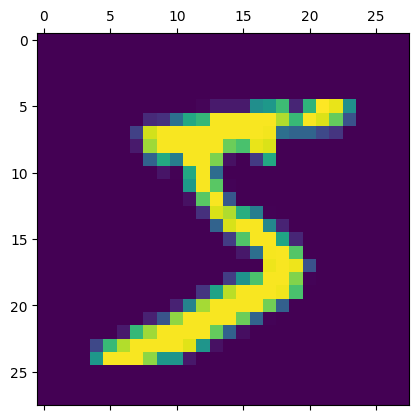

In [7]:
plt.matshow(X_train[0])


In [8]:
y_train[0]


5

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape


(60000, 784)

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4664 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3035 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2833 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2732 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2671 - accuracy: 0.9256


In [12]:
model.evaluate(X_test_flattened, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.2677 - accuracy: 0.9248


[0.2677493989467621, 0.9247999787330627]

In [13]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 1ms/step


array([2.5515437e-02, 4.7324548e-07, 7.0825331e-02, 9.6549857e-01,
       2.4682025e-03, 1.3523664e-01, 1.7731585e-06, 9.9983060e-01,
       1.0227449e-01, 6.5601569e-01], dtype=float32)

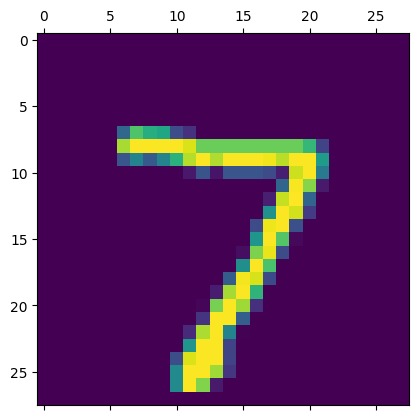

In [14]:
plt.matshow(X_test[0])


In [15]:
np.argmax(y_predicted[0])

7

Text(95.72222222222221, 0.5, 'Truth')

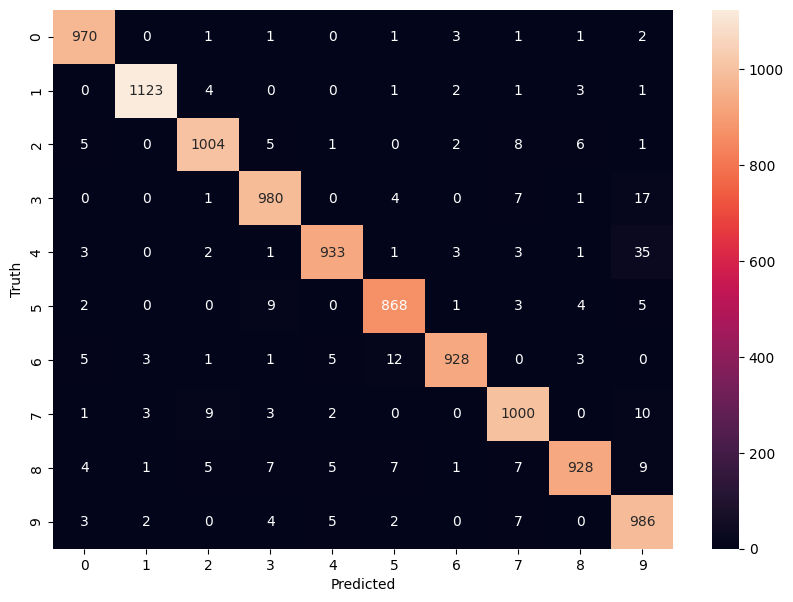

In [27]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')